In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import wave

TensorFlow version: 2.6.0


In [2]:
import librosa
import pandas as pd
import os
import numpy as np
from tqdm import tqdm

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout

import IPython.display as ipd

In [3]:
#importing  libraries
#Keras
import tensorflow.keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

#sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Others
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import tensorflow as tf
import pandas as pd
import seaborn as sns
import glob
import os
import pickle
import IPython.display as ipd
import csv
from tqdm import tqdm
import os


import sys
import os
import IPython
import math
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import random
from datetime import datetime
#from include import helpers

from tensorflow.keras import backend as keras_backend
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, SpatialDropout2D, Activation, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
#split the dataset into train and test
X_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_train_mfcc.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_train_mfcc.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_test_mfcc.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_test_mfcc.csv')
#take a peak at the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4499, 40), (4499, 1), (4233, 41), (4233, 2))

In [5]:
#One hot encode labels

le = LabelEncoder()

def encoding_y(data):
  data = np.array(data['label'])
  data = to_categorical(le.fit_transform(data))
  return data

y_train = encoding_y(y_train)
y_test = encoding_y(y_test) 

In [6]:
X_test = X_test.iloc[:,1:41]

def standardization(data):
  mean = np.mean(data,axis=0)
  std = np.std(data, axis=0)
  data =( data - mean)/std
  data = np.array(data)
  data=np.reshape(data,(data.shape[0],1, 40, 1))
  return data

X_train = standardization(X_train)
X_test = standardization(X_test)


In [7]:
#builing our CNN model
#forming model
model=Sequential()


model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(1,40,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10,activation="softmax"))

opt_sgd = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.0, decay=0.0, nesterov=False)
opt_adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
opt_rmp = tensorflow.keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 40, 64)         1664      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 1, 40, 64)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 40, 64)         256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 20, 64)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 20, 128)        204928    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1, 20, 128)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 20, 128)        5

In [8]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(X_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 40, 64)         1664      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 1, 40, 64)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 40, 64)         256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 20, 64)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 20, 128)        204928    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1, 20, 128)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 20, 128)        5

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4499, 1, 40, 1), (4233, 1, 40, 1), (4499, 10), (4233, 10))

In [10]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 


num_epochs = 250
num_batch_size = 256

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model_mfc = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/250
18/18 [==============================] - 5s 124ms/step - loss: 1.8272 - accuracy: 0.3934 - val_loss: 2.2460 - val_accuracy: 0.3012

Epoch 00001: val_loss improved from inf to 2.24596, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 2/250
18/18 [==============================] - 2s 101ms/step - loss: 1.0048 - accuracy: 0.6595 - val_loss: 2.1913 - val_accuracy: 0.1384

Epoch 00002: val_loss improved from 2.24596 to 2.19133, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 3/250
18/18 [==============================] - 2s 111ms/step - loss: 0.6884 - accuracy: 0.7648 - val_loss: 2.1764 - val_accuracy: 0.1257

Epoch 00003: val_loss improved from 2.19133 to 2.17636, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 4/250
18/18 [==============================] - 2s 98ms/step - loss: 0.5300 - accuracy: 0.8124 - val_loss: 2.2536 - val_accuracy: 0.1247

Epoch 00004: val_loss did not improve from 2.17636
Epoch 5/250
18/18 [====================

18/18 [==============================] - 2s 110ms/step - loss: 0.0345 - accuracy: 0.9867 - val_loss: 3.2936 - val_accuracy: 0.5285

Epoch 00042: val_loss did not improve from 2.17636
Epoch 43/250
18/18 [==============================] - 2s 120ms/step - loss: 0.0395 - accuracy: 0.9862 - val_loss: 3.1794 - val_accuracy: 0.5379

Epoch 00043: val_loss did not improve from 2.17636
Epoch 44/250
18/18 [==============================] - 2s 129ms/step - loss: 0.0403 - accuracy: 0.9873 - val_loss: 3.1503 - val_accuracy: 0.5311

Epoch 00044: val_loss did not improve from 2.17636
Epoch 45/250
18/18 [==============================] - 2s 115ms/step - loss: 0.0344 - accuracy: 0.9893 - val_loss: 3.3265 - val_accuracy: 0.5178

Epoch 00045: val_loss did not improve from 2.17636
Epoch 46/250
18/18 [==============================] - 2s 127ms/step - loss: 0.0337 - accuracy: 0.9898 - val_loss: 3.2931 - val_accuracy: 0.5320

Epoch 00046: val_loss did not improve from 2.17636
Epoch 47/250
18/18 [=============


Epoch 00124: val_loss did not improve from 2.17636
Epoch 125/250
18/18 [==============================] - 3s 180ms/step - loss: 0.0186 - accuracy: 0.9931 - val_loss: 3.9789 - val_accuracy: 0.5197

Epoch 00125: val_loss did not improve from 2.17636
Epoch 126/250
18/18 [==============================] - 3s 171ms/step - loss: 0.0203 - accuracy: 0.9929 - val_loss: 3.7391 - val_accuracy: 0.5228

Epoch 00126: val_loss did not improve from 2.17636
Epoch 127/250
18/18 [==============================] - 3s 172ms/step - loss: 0.0149 - accuracy: 0.9953 - val_loss: 3.6309 - val_accuracy: 0.5308

Epoch 00127: val_loss did not improve from 2.17636
Epoch 128/250
18/18 [==============================] - 3s 179ms/step - loss: 0.0133 - accuracy: 0.9956 - val_loss: 3.7485 - val_accuracy: 0.5334

Epoch 00128: val_loss did not improve from 2.17636
Epoch 129/250
18/18 [==============================] - 3s 151ms/step - loss: 0.0137 - accuracy: 0.9960 - val_loss: 3.7285 - val_accuracy: 0.5169

Epoch 00129: v


Epoch 00207: val_loss did not improve from 2.17636
Epoch 208/250
18/18 [==============================] - 3s 150ms/step - loss: 0.0132 - accuracy: 0.9956 - val_loss: 4.3622 - val_accuracy: 0.5209

Epoch 00208: val_loss did not improve from 2.17636
Epoch 209/250
18/18 [==============================] - 3s 183ms/step - loss: 0.0128 - accuracy: 0.9960 - val_loss: 4.3901 - val_accuracy: 0.5301

Epoch 00209: val_loss did not improve from 2.17636
Epoch 210/250
18/18 [==============================] - 3s 172ms/step - loss: 0.0141 - accuracy: 0.9964 - val_loss: 4.3662 - val_accuracy: 0.5214

Epoch 00210: val_loss did not improve from 2.17636
Epoch 211/250
18/18 [==============================] - 3s 173ms/step - loss: 0.0175 - accuracy: 0.9951 - val_loss: 4.7045 - val_accuracy: 0.5254

Epoch 00211: val_loss did not improve from 2.17636
Epoch 212/250
18/18 [==============================] - 3s 187ms/step - loss: 0.0159 - accuracy: 0.9953 - val_loss: 4.7177 - val_accuracy: 0.5216

Epoch 00212: v

In [12]:
# Evaluating the model on the training and testing set

score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9995554685592651
Testing Accuracy:  0.5102763772010803


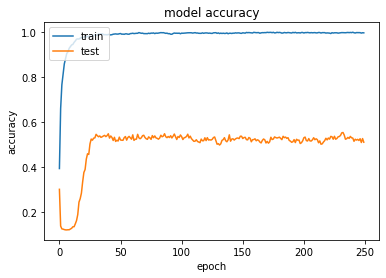

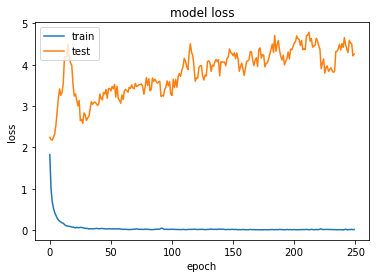

In [13]:
# summarize history for accuracy
plt.plot(model_mfc.history['accuracy'])
plt.plot(model_mfc.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_mfc.history['loss'])
plt.plot(model_mfc.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
train_hist = pd.DataFrame(model_mfc.history)
train_hist

,loss,accuracy,val_loss,val_accuracy
0,1.827234,0.393421,2.245959,0.301205
1,1.004758,0.659480,2.191328,0.138436
2,0.688417,0.764837,2.176355,0.125679
3,0.530028,0.812403,2.253567,0.124734
4,0.425734,0.857524,2.325171,0.122608
...,...,...,...,...
245,0.015645,0.995555,4.589406,0.517836
246,0.012067,0.996221,4.525429,0.525632
247,0.020319,0.994221,4.511594,0.508859
248,0.011281,0.995777,4.215214,0.526341


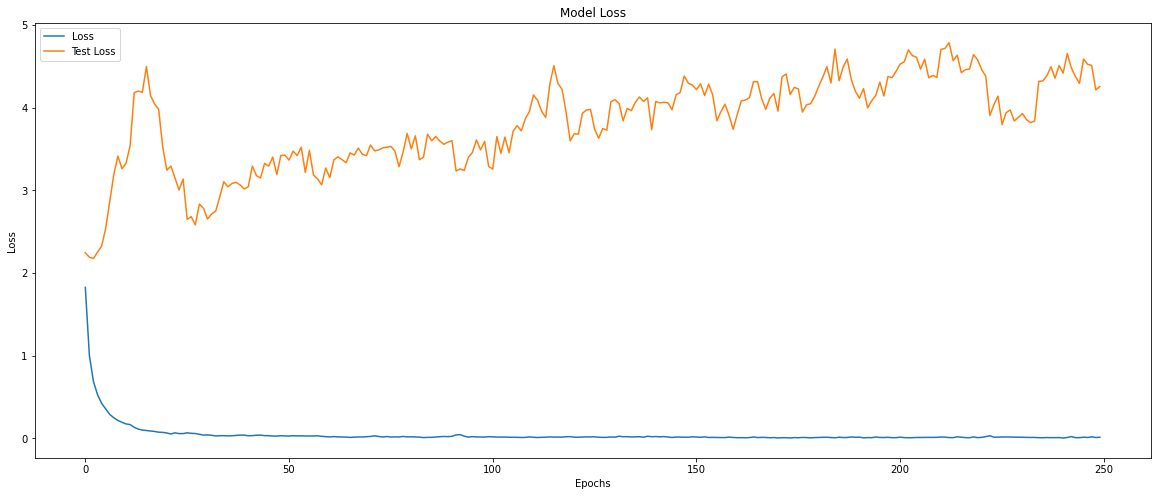

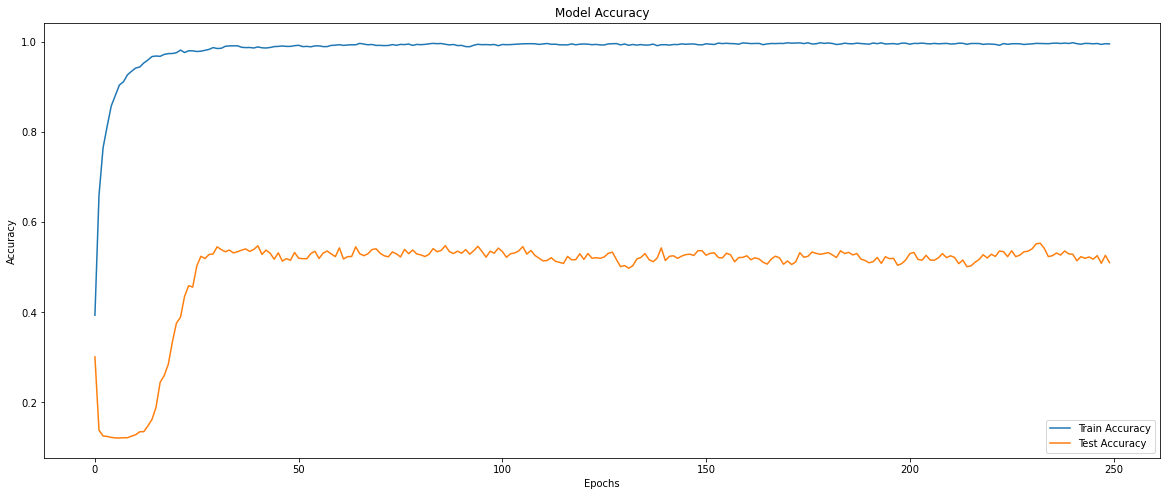

In [15]:
plt.figure(figsize=(20,8))
plt.plot(train_hist[['loss','val_loss']])
plt.legend(['Loss','Test Loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(20,8))
plt.plot(train_hist[['accuracy','val_accuracy']])
plt.legend(['Train Accuracy','Test Accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [16]:
ytrue = np.argmax(y_test,axis=1)
ypred = np.argmax(model.predict(X_test),axis=1)
print('\nConfusion Matrix :\n\n')
print(confusion_matrix(ytrue,ypred))
print('\n\nClassification Report : \n\n',classification_report(ytrue,ypred))


Confusion Matrix :


[[150   6  59  44  35  36   4  34  19 113]
 [  2 181   5   4   1   2   0   2   2  22]
 [ 24   3 295  41   8   9  20   7  46  47]
 [ 28   5  54 350   7   2   8   3  22  21]
 [  6   6  56  66 172  11   6 103   9  65]
 [ 38  10  37  58  10 161   0  86  16  67]
 [  1   0  22  30   1   0 125   0   1   4]
 [ 31  15   7   3 176   3   3 174  12  28]
 [  3   3  20  78   1   6   3   4 253  22]
 [ 22  13  42  47  30   6   3  15  23 299]]


Classification Report : 

               precision    recall  f1-score   support

           0       0.49      0.30      0.37       500
           1       0.75      0.82      0.78       221
           2       0.49      0.59      0.54       500
           3       0.49      0.70      0.57       500
           4       0.39      0.34      0.37       500
           5       0.68      0.33      0.45       483
           6       0.73      0.68      0.70       184
           7       0.41      0.38      0.40       452
           8       0.63      0.